In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras import regularizers

from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.layers import Bidirectional
from keras.preprocessing import sequence
from keras.models import model_from_json
from keras.models import load_model


# Data Import

In [4]:
dataset = pd.read_csv("Tweets.csv")
dataset_train = dataset.loc[:,["text", "airline_sentiment"]]
sentiment = {'neutral': 0,'negative': -1, "positive": 1}
dataset_train.airline_sentiment = [sentiment[item] for item in dataset_train.airline_sentiment]
dataset_train.to_csv ("dataset_train.csv", index = False, header=True)

In [7]:
import nltk
import re
description_list = []
for description in dataset_train.text:
    #Regular Expression
    description = re.sub("[^a-zA-Z]", " ", description)
    description = description.lower()
    description = nltk.word_tokenize(description)
    #Lemmatazation
    lemma = nltk.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    #description = [word for word in description if not word in stopwords.words()]
    description = " ".join(description)
    description_list.append(description)

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/Users/keremkosif/nltk_data'
    - '/Users/keremkosif/opt/anaconda3/nltk_data'
    - '/Users/keremkosif/opt/anaconda3/share/nltk_data'
    - '/Users/keremkosif/opt/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
#X = filtered_dataset.loc[:, "description"].values
X = np.array(description_list)
y = dataset_train.airline_sentiment.values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train, num_classes = 3)
y_test = to_categorical(y_test, num_classes = 3)

# Naturel Language Proccesing

In [ ]:
vocab_size = 1000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Train
sequences_train = tokenizer.texts_to_sequences(X_train)
padded_train = pad_sequences(sequences_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(padded_train)

# Test
sequences_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(sequences_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
training_padded = np.array(padded_train)
training_label = np.array(y_train)
test_padded = np.array(padded_test)
test_label = np.array(y_test)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    #tf.keras.layers.LSTM(15, dropout=0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
num_epochs = 25
history = model.fit(training_padded, training_label, batch_size=32 ,epochs=num_epochs, validation_data=(test_padded, test_label), verbose=2)

In [10]:
#embed_dim = 128
#lstm_out = 196
#with tf.device("/device:GPU:0"):
#    model = tf.keras.Sequential()
#    model.add(tf.keras.layers.Embedding(vocab_size, embed_dim, input_length=max_length))
#    model.add(tf.keras.layers.SpatialDropout1D(0.4))
#    model.add(tf.keras.layers.LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
#    model.add(Dense(3,activation='sigmoid'))
#    model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
#    num_epochs = 20
#    history = model.fit(training_padded, training_label, batch_size=32 ,epochs=num_epochs, validation_data=(test_padded, test_label), verbose=2)

In [11]:
#with tf.device("/device:GPU:0"):
#    model0 = Sequential()
#    model0.add(tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length))
#    model0.add(tf.keras.layers.SimpleRNN(15,return_sequences=True))
#    model0.add(tf.keras.layers.SimpleRNN(15))
#    model0.add(tf.keras.layers.Dense(3,activation='sigmoid'))
#    model0.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
#    num_epochs = 20
#    history = model0.fit(training_padded, training_label, batch_size=32 ,epochs=num_epochs, validation_data=(test_padded, test_label), verbose=2)

In [12]:
#model3 = Sequential()
#model3.add(tf.keras.layers.Embedding(vocab_size, 40, input_length=max_length))
#model3.add(tf.keras.layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
#model3.add(tf.keras.layers.MaxPooling1D(5))
#model3.add(tf.keras.layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
#model3.add(tf.keras.layers.GlobalMaxPooling1D())
#model3.add(tf.keras.layers.Dense(3,activation='softmax'))
#model3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
#history = model3.fit(training_padded, training_label, epochs=20,validation_data=(test_padded, test_label))

In [13]:
#tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
#tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

In [14]:
#with tpu_strategy.scope():
#    mode5 = Sequential()
#    mode5.add(tf.keras.layers.Embedding(vocab_size, 40, input_length=max_length))
#    mode5.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
#    mode5.add(tf.keras.layers.Dense(512, activation='relu'))
#    mode5.add(tf.keras.layers.Dropout(0.50))
#    mode5.add(tf.keras.layers.Dense(3, activation='softmax'))
#    mode5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#    history = mode5.fit(training_padded, training_label, epochs=20,validation_data=(test_padded, test_label))

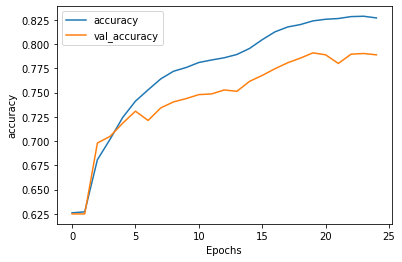

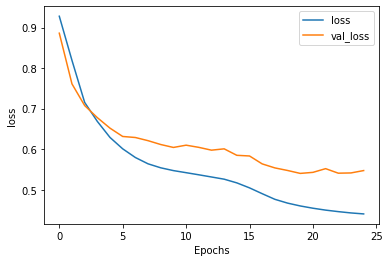

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(X_train[2])
print(y_train[2])

southwestair thank you great <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
americanair delayed aa missed due to delay aa new flight now delayed aa
[0. 0. 1.]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
sentence = ["I want to play game"]#, "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

raw_prediction = model.predict(padded)
#final_prediction = np.where(raw_prediction > 0.09, 1, 0)
print(raw_prediction)
#cm = confusion_matrix(test_label, raw_prediction)
#print(cm)
